In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset 
df=pd.read_csv("ind_normalize1.csv")
# Features and target variable selection
X = df[['co','no','nox','no2', 'o3', 'pm25', 'so2']]  # Features
y = df['AQI']  # Target variable
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Define the individual base models (estimators)
estimators_1 = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('mlp',MLPRegressor(hidden_layer_sizes=(25, 25), max_iter=500, random_state=42)),
    ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
]

In [5]:
estimators_2 = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('mlp',MLPRegressor(hidden_layer_sizes=(25, 25), max_iter=500, random_state=42)),
]


In [6]:
estimators_3 = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('mlp',MLPRegressor(hidden_layer_sizes=(25, 25), max_iter=500, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]

In [9]:
estimators_4 = [
    ('mlp',MLPRegressor(hidden_layer_sizes=(25, 25), max_iter=500, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=10, random_state=42))
]

In [10]:
# # Define the stacking regressor for each set of base models
# from sklearn.linear_model import LinearRegression
stacking_1 = StackingRegressor(estimators=estimators_1, final_estimator=LinearRegression())
stacking_2 = StackingRegressor(estimators=estimators_2, final_estimator=LinearRegression())
stacking_3 = StackingRegressor(estimators=estimators_3, final_estimator=LinearRegression())
stacking_4 = StackingRegressor(estimators=estimators_4, final_estimator=LinearRegression())

In [ ]:
# Train each model
stacking_1.fit(X_train, y_train)

In [ ]:
stacking_2.fit(X_train, y_train)

In [ ]:
stacking_3.fit(X_train, y_train)
stacking_4.fit(X_train, y_train)

In [17]:
# Predict with each model
y_pred_1 = stacking_1.predict(X_test)
y_pred_2 = stacking_2.predict(X_test)
y_pred_3 = stacking_3.predict(X_test)
y_pred_4 = stacking_4.predict(X_test)

In [18]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

mse_1, rmse_1, mae_1, r2_1 = evaluate_model(y_test, y_pred_1)
mse_2, rmse_2, mae_2, r2_2 = evaluate_model(y_test, y_pred_2)
mse_3, rmse_3, mae_3, r2_3 = evaluate_model(y_test, y_pred_3)
mse_4, rmse_4, mae_4, r2_4 = evaluate_model(y_test, y_pred_4)

In [19]:
# Display the evaluation results
print(f"Stacking Model 1 (RF, MLP, XGBoost): MSE={mse_1}, RMSE={rmse_1}, MAE={mae_1}, R2={r2_1}")
print(f"Stacking Model 2 (RF, MLP): MSE={mse_2}, RMSE={rmse_2}, MAE={mae_2}, R2={r2_2}")
print(f"Stacking Model 3 (RF, MLP, SVR): MSE={mse_3}, RMSE={rmse_3}, MAE={mae_3}, R2={r2_3}")
print(f"Stacking Model 4 (MLP, XGBoost): MSE={mse_4}, RMSE={rmse_4}, MAE={mae_4}, R2={r2_4}")

Stacking Model 1 (RF, MLP, XGBoost): MSE=268.525017748523, RMSE=16.386732979716335, MAE=2.665357270592592, R2=0.9083366182958811
Stacking Model 2 (RF, MLP, SVR): MSE=290.30922170224846, RMSE=17.038463008800075, MAE=3.057668448980073, R2=0.9009003882608803
Stacking Model 3 (RF, LightGBM): MSE=338.932362934503, RMSE=18.410115777324783, MAE=3.28976737525989, R2=0.8843024504158508
Stacking Model 4 (RF, XGBoost): MSE=337.9781758364798, RMSE=18.384182762268217, MAE=3.3823966319246535, R2=0.8846281705923787


<Figure size 1400x800 with 0 Axes>

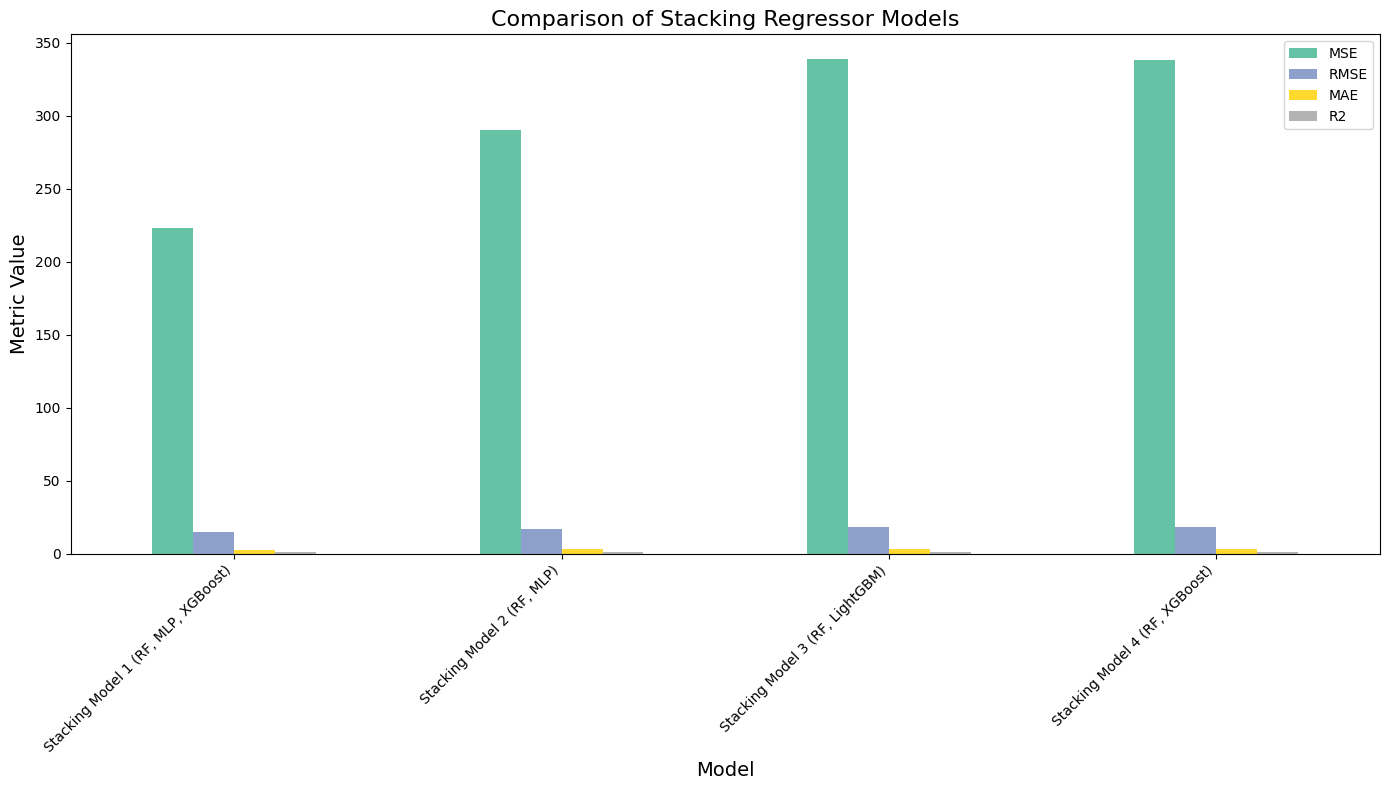

In [14]:
# Create a DataFrame to hold the evaluation metrics for each model
metrics = {
    'Model': ['Stacking Model 1 (RF, MLP, XGBoost)', 'Stacking Model 2 (RF, MLP)', 'Stacking Model 3 (RF, MLP, SVR)', 'Stacking Model 4 (MLP, XGBoost)'],
    'MSE': [mse_1, mse_2,  mse_3, mse_4],
    'RMSE': [rmse_1, rmse_2, rmse_3, rmse_4],
    'MAE': [mae_1, mae_2, mae_3, mae_4],
    'R2': [r2_1,  r2_2, r2_3, r2_4]
}

# Convert the dictionary into a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the figure size for the plots
plt.figure(figsize=(14, 8))

# Plot MSE, RMSE, MAE, and R2 for comparison
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8), colormap='Set2')

# Adding labels and title to the plot
plt.title('Comparison of Stacking Regressor Models', fontsize=16)
plt.ylabel('Metric Value', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
